In [16]:
import pandas as pd
import numpy as np
from collections import Counter
from collections import defaultdict
import heapq
import pandas as pd
import statsmodels.api as sm


In [17]:

# Load the data into a DataFrame
df = pd.read_excel("~/Chocolate.xlsx")

df['Cocoa Percent'] = df['Cocoa Percent']*100
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredient Count,Ingredients,Most Memorable Characteristics,Rating
0,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70.0,2.0,"B,S","chalky, fragrant, then off",2.50
1,999,Bahen & Co.,Australia,2012,Brazil,Bahia,70.0,2.0,"B,S","chalky, intense, chemical",2.50
2,999,Mast Brothers,U.S.A.,2012,Venezuela,Chuao,73.0,2.0,"B,S","gritty, sour, sweet",2.75
3,999,Mast Brothers,U.S.A.,2012,Blend,Madagascar,72.0,2.0,"B,S","gritty, overly tart, sour",2.50
4,995,Bahen & Co.,Australia,2012,Madagascar,Sambirano,70.0,2.0,"B,S","unrefined, flat, grassy",3.00


In [18]:

df['Cocoa Percent'] = df['Cocoa Percent'].astype(str)
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)  # Convert to float

df['Rating'] = df['Rating'].astype(int)
df['Ingredients'] = df['Ingredients'].astype(str)


In [4]:


#Filter the DataFrame for the cocoa percentage range
cocoa_40_50_df = df[(df['Cocoa Percent'] >= 40) & (df['Cocoa Percent'] <= 50)]

cocoa_50_60_df = df[(df['Cocoa Percent'] >= 50) & (df['Cocoa Percent'] <= 60)]
cocoa_60_70_df = df[(df['Cocoa Percent'] >= 60) & (df['Cocoa Percent'] <= 70)]
cocoa_70_80_df = df[(df['Cocoa Percent'] >= 70) & (df['Cocoa Percent'] <= 80)]
cocoa_80_90_df = df[(df['Cocoa Percent'] >= 80) & (df['Cocoa Percent'] <= 90)]
cocoa_90_100_df= df[(df['Cocoa Percent'] >= 90) & (df['Cocoa Percent'] <= 100)]


In [5]:


def analyze_chocolate(cocoadf,cocoa_range):
    # Calculate average rating
    average_rating = cocoadf['Rating'].mean()

    # Get the top 5 origins
    top_5_origins = cocoadf['Country of Bean Origin'].value_counts().head(5)

    # Aggregate notes and ingredients
    all_notes = ' '.join(cocoadf['Most Memorable Characteristics'].dropna()).split(',')
    all_ingredients = ' '.join(cocoadf['Ingredients']).split(',')

    notes_counter = Counter(note.strip() for note in all_notes if note)
    ingredients_counter = Counter(ingredient.strip() for ingredient in all_ingredients if ingredient)

    top_5_notes = notes_counter.most_common(5)
    top_3_ingredients = ingredients_counter.most_common(3)

    # Display the results
    print(f'Records processed : { len(cocoadf)}')
    print(f'Chocolate bars with {cocoa_range} cocoa have an average rating of {average_rating:.2f}')
    print(f'Top 5 Origins: {", ".join(f"{origin} ({count})" for origin, count in top_5_origins.items())}')
    print(f'Top 5 Notes: {", ".join(note for note, _ in top_5_notes)}')
    print(f'Common Ingredients: {", ".join(ingredient for ingredient, _ in top_3_ingredients)}')






In [6]:
analyze_chocolate(cocoa_40_50_df,"40–50%")


Records processed : 3
Chocolate bars with 40–50% cocoa have an average rating of 2.33
Top 5 Origins: Brazil (1), Blend (1), Martinique (1)
Top 5 Notes: very sweet, bright red, banana very sweet, caramel, candy gritty
Common Ingredients: S, C, L  B


In [7]:
analyze_chocolate(cocoa_50_60_df,"50–60%")


Records processed : 76
Chocolate bars with 50–60% cocoa have an average rating of 2.64
Top 5 Origins: Blend (14), Ecuador (13), Peru (6), Venezuela (6), Brazil (5)
Top 5 Notes: sweet, nutty, vanilla, dairy, hazelnut
Common Ingredients: S, C, L  B


In [8]:
analyze_chocolate(cocoa_60_70_df,"60–70%")


Records processed : 1474
Chocolate bars with 60–70% cocoa have an average rating of 2.87
Top 5 Origins: Peru (159), Dominican Republic (136), Venezuela (130), Madagascar (108), Ecuador (97)
Top 5 Notes: sweet, nutty, earthy, cocoa, floral
Common Ingredients: S, C  B, S  B


In [9]:
analyze_chocolate(cocoa_70_80_df,"70–80%")


Records processed : 2133
Chocolate bars with 70–80% cocoa have an average rating of 2.84
Top 5 Origins: Venezuela (220), Peru (207), Dominican Republic (199), Ecuador (167), Madagascar (146)
Top 5 Notes: nutty, roasty, sweet, cocoa, earthy
Common Ingredients: S, C  B, S  B


In [10]:
analyze_chocolate(cocoa_80_90_df,"80–90%")


Records processed : 187
Chocolate bars with 80–90% cocoa have an average rating of 2.66
Top 5 Origins: Ecuador (29), Blend (19), Venezuela (17), Dominican Republic (17), Peru (12)
Top 5 Notes: bitter, earthy, fruit, tart, spicy
Common Ingredients: S, C  B, C


In [11]:
analyze_chocolate(cocoa_90_100_df,"90–100%")

Records processed : 35
Chocolate bars with 90–100% cocoa have an average rating of 2.17
Top 5 Origins: Ecuador (11), Blend (9), Venezuela (3), Madagascar (2), Peru (2)
Top 5 Notes: bitter, spicy, intense, mild fruit, tart
Common Ingredients: S, C, C  B


In [14]:
df['Cocoa Percent']


0       70.0
1       70.0
2       73.0
3       72.0
4       70.0
        ... 
2652    85.0
2653    72.0
2654    72.0
2655    72.0
2656    72.0
Name: Cocoa Percent, Length: 2657, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     38.83
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           5.37e-10
Time:                        21:46:34   Log-Likelihood:                -1905.4
No. Observations:                2657   AIC:                             3815.
Df Residuals:                    2655   BIC:                             3827.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.5921      0.125     28.767

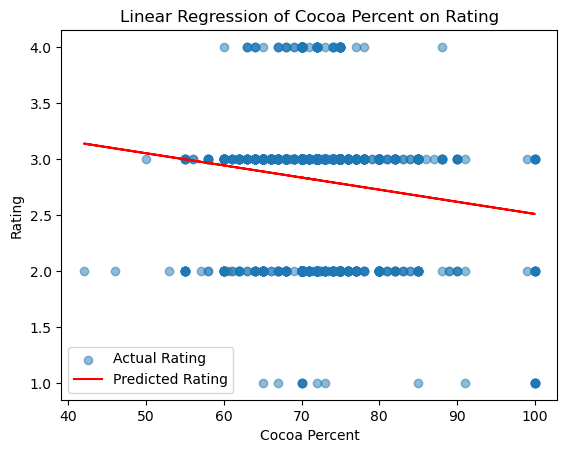

In [19]:


# Define the predictor (X) and response (y) variables
X = df[['Cocoa Percent']]  # The predictor variable(s)
y = df['Rating']           # The response variable

# Add a constant to the predictor variable set to represent the intercept
X = sm.add_constant(X)

# Create a model and fit it
model = sm.OLS(y, X).fit()

# See the summary of the regression
print(model.summary())

# Use the model to make predictions
df['Predicted Rating'] = model.predict(X)

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(df['Cocoa Percent'], df['Rating'], alpha=0.5, label='Actual Rating')
plt.plot(df['Cocoa Percent'], df['Predicted Rating'], color='red', label='Predicted Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.title('Linear Regression of Cocoa Percent on Rating')
plt.legend()
plt.show()
